In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import itertools

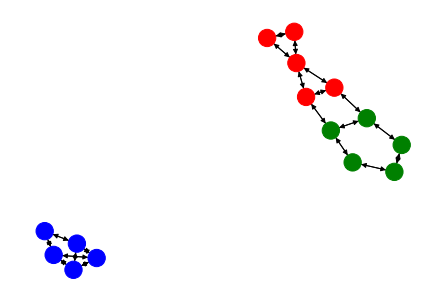

In [2]:
#3
data=np.random.binomial(size = (15, 15), n = 1, p = 0.1)
p=0.6
clique=[]
for i in range(15):
    for j in range(15):
        if i<5 :
            if j<5:
                data[i][j]=np.random.binomial(1,p)
        elif i<10:
            if j<10 and j>=5:
                data[i][j]=np.random.binomial(1,p)
        else:
            if j>=10:
                data[i][j]=np.random.binomial(1,p)
    for i in range(15):
        data[i][i]=0
        for j in range(15):
            data[j][i]=data[i][j]
clique.append(data)
Graph=nx.DiGraph(clique[0])
nx.draw(Graph, node_color=['red', 'red', 'red', 'red', 'red',
                            'green', 'green', 'green', 'green', 'green',
                            'blue', 'blue', 'blue', 'blue', 'blue'])
plt.show()
def datagenerate(z0):
    data=np.random.binomial(size = (15, 15), n = 1, p = 0.1)
    for i in range(15):
        data[i][i]=0
    for i in range(15):
        for j in range(i):
            if z0[i]==z0[j]:
                data[i][j]=np.random.binomial(1,p)
                data[j][i]=data[i][j]
    return data

In [3]:
#4
def d_H(z1, z2):
    acc = 0
    for i in range(len(z1)):
        if z1[i] != z2[i]:
            acc += 1
    return acc

z1 = np.array([1, 3, 1, 3, 2, 3, 3, 2, 2, 1, 1, 1, 2, 3, 3])
z2 = np.array([1, 2, 3, 3, 2, 3, 2, 2, 3, 1, 1, 1, 1, 3, 3])
print(d_H(z1, z2))

5


In [4]:
#5
def d(z1,z2):
    x=set(z2)
    
    permutations=list(itertools.permutations(list(x)))
    #display(permutations[1])
    mindis=10000
    for i in permutations:
        t=[]
        for j in z2:
            t.append(i[j-1])
        #display(t)
        dis=d_H(t,z1)
        if dis<mindis:
            mindis=dis
    return mindis
    
z1=np.array([3, 1, 1, 2, 2, 1, 1, 1, 3, 3, 2, 2, 2, 3, 3])
z2=np.array([1, 1, 1, 2, 2, 3, 1, 3, 1, 2, 2, 2, 3, 3, 3])
print(d(z1,z2))

6


In [5]:
#6
def loglikelihood(A, z):
    L=0
    for i in range(15):
        for j in range(i):
            if z[i]==z[j]:
                if A[i][j]==0:
                    L+=np.log(0.4)
                else:
                    L+=np.log(0.6)
            else:
                if A[i][j]==0:
                    L+=np.log(0.9)
                else:
                    L+=np.log(0.1)
    return -L
#log(pi(prob_of_individuals))=sigma(log(prob_of_individuals))

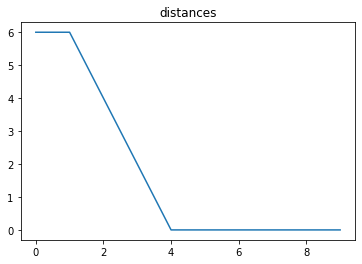

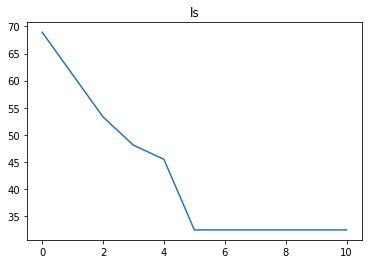

[array([1, 1, 2, 3, 2, 1, 2, 3, 3, 3, 2, 1, 1, 2, 3]),
 array([1, 1, 2, 2, 2, 1, 3, 3, 3, 3, 2, 1, 1, 2, 3]),
 array([1, 2, 2, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1, 2, 3]),
 array([1, 2, 2, 2, 1, 3, 3, 3, 3, 3, 2, 1, 1, 2, 1]),
 array([2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 1, 1, 1, 2, 1]),
 array([2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1]),
 array([2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1]),
 array([2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1]),
 array([2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1]),
 array([2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1]),
 array([2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1])]

In [6]:
#7
def newZcomputer(A,z):
    newz=[]
    minindex=np.array([-1,-1])
    minlog=1000
    for i in range(len(z)):
        zi=z[i]
        for j in range(i):
            newz=z.copy()
            newz[i]=newz[j]
            newz[j]=zi
            if minlog>loglikelihood(A,newz):
                minlog=loglikelihood(A,newz)
                minindex=np.array([i,j])
    i=minindex[0]
    j=minindex[1]
    newz=z.copy()
    newz[i]+=newz[j]
    newz[j]=newz[i]-newz[j]
    newz[i]-=newz[j]
    return newz
Z0=np.array([1,1,1,1,1,2,2,2,2,2,3,3,3,3,3])
z0=np.array([1,1,1,1,1,2,2,2,2,2,3,3,3,3,3])
np.random.shuffle(z0)
T=10
Zs=[]
dis=[]
Zs.append(z0)
for i in range(T):
    disi=0
    newz=newZcomputer(data,Zs[i])
    Zs.append(newz)
    dis.append(d(Z0,newz))
ls=[]
for i in Zs:
    ls.append(loglikelihood(data,i))
plt.plot(dis)
plt.title('distances')
plt.show()
plt.plot(ls)
plt.title('ls')
plt.show()
display(Zs)

In [7]:
#8
N=10
ALL=[]
STARTS=[]
for i in range(N):
    print("n = ",i+1)
    np.random.shuffle(z0)
    #data=datagenerate(z0)
    STARTS.append(z0)
    Zs=[]
    dis=[]
    print(z0)
    Zs.append(z0)
    for i in range(T):
        newz=newZcomputer(data,Zs[i])
        Zs.append(newz)
        disi=d(Z0,newz)
        dis.append(disi)
    ALL.append(Zs[T])
    print("distances = {}".format(dis))
    print("z0 = {}".format(z0))
    print("ZT = {}".format(Zs[T]))
#running the algorithm for 10 different starting point that gets generated by random.shuffle
#The first array is z0 and the second one is ZT and first we print the array distance between the z0 and Zi's
#There are zero and non zero results

n =  1
[2 3 2 1 2 3 1 2 2 1 1 3 3 1 3]
distances = [5, 3, 2, 0, 0, 0, 0, 0, 0, 0]
z0 = [2 3 2 1 2 3 1 2 2 1 1 3 3 1 3]
ZT = [2 2 2 2 2 1 1 1 1 1 3 3 3 3 3]
n =  2
[1 3 1 2 2 1 3 2 3 1 2 3 1 2 3]
distances = [7, 7, 5, 4, 4, 4, 4, 4, 4, 4]
z0 = [1 3 1 2 2 1 3 2 3 1 2 3 1 2 3]
ZT = [1 3 3 1 1 1 3 3 3 1 2 2 2 2 2]
n =  3
[1 1 3 2 2 3 1 2 1 1 2 3 3 2 3]
distances = [6, 4, 2, 0, 0, 0, 0, 0, 0, 0]
z0 = [1 1 3 2 2 3 1 2 1 1 2 3 3 2 3]
ZT = [2 2 2 2 2 1 1 1 1 1 3 3 3 3 3]
n =  4
[3 1 2 3 1 2 2 3 2 1 3 3 2 1 1]
distances = [6, 4, 2, 0, 0, 0, 0, 0, 0, 0]
z0 = [3 1 2 3 1 2 2 3 2 1 3 3 2 1 1]
ZT = [1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]
n =  5
[1 2 2 3 2 2 3 1 3 1 1 2 3 3 1]
distances = [6, 4, 2, 0, 0, 0, 0, 0, 0, 0]
z0 = [1 2 2 3 2 2 3 1 3 1 1 2 3 3 1]
ZT = [2 2 2 2 2 1 1 1 1 1 3 3 3 3 3]
n =  6
[2 1 3 3 1 1 1 2 2 3 3 2 1 3 2]
distances = [7, 5, 4, 2, 0, 0, 0, 0, 0, 0]
z0 = [2 1 3 3 1 1 1 2 2 3 3 2 1 3 2]
ZT = [1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]
n =  7
[3 1 1 1 2 3 3 2 3 1 2 3 2 2 1]
distances = [5, 4, 4, 4, 

In [8]:
#9
for i in range(N):
    display(ALL[i])
    display(STARTS[i])
    x=loglikelihood(data,ALL[i])
    y=loglikelihood(data,Z0)
    print("-L of ZT's={}".format(x))
    print("-L of Z0's={}".format(y))
    print(x==y)
#using the z0's and zT's that were saved before, we print the log likelihood function and finally if they are equal

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3])

array([1, 1, 2, 1, 3, 2, 3, 1, 3, 2, 2, 2, 3, 3, 1])

-L of ZT's=32.486837839287055
-L of Z0's=32.486837839287055
True


array([1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 2, 2, 2, 2, 2])

array([1, 1, 2, 1, 3, 2, 3, 1, 3, 2, 2, 2, 3, 3, 1])

-L of ZT's=37.69221721017584
-L of Z0's=32.486837839287055
False


array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3])

array([1, 1, 2, 1, 3, 2, 3, 1, 3, 2, 2, 2, 3, 3, 1])

-L of ZT's=32.486837839287055
-L of Z0's=32.486837839287055
True


array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])

array([1, 1, 2, 1, 3, 2, 3, 1, 3, 2, 2, 2, 3, 3, 1])

-L of ZT's=32.486837839287055
-L of Z0's=32.486837839287055
True


array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3])

array([1, 1, 2, 1, 3, 2, 3, 1, 3, 2, 2, 2, 3, 3, 1])

-L of ZT's=32.486837839287055
-L of Z0's=32.486837839287055
True


array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])

array([1, 1, 2, 1, 3, 2, 3, 1, 3, 2, 2, 2, 3, 3, 1])

-L of ZT's=32.486837839287055
-L of Z0's=32.486837839287055
True


array([3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 2, 2, 2, 2, 2])

array([1, 1, 2, 1, 3, 2, 3, 1, 3, 2, 2, 2, 3, 3, 1])

-L of ZT's=37.69221721017584
-L of Z0's=32.486837839287055
False


array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1])

array([1, 1, 2, 1, 3, 2, 3, 1, 3, 2, 2, 2, 3, 3, 1])

-L of ZT's=32.486837839287055
-L of Z0's=32.486837839287055
True


array([1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 3, 3, 3, 3, 3])

array([1, 1, 2, 1, 3, 2, 3, 1, 3, 2, 2, 2, 3, 3, 1])

-L of ZT's=37.69221721017584
-L of Z0's=32.486837839287055
False


array([1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2])

array([1, 1, 2, 1, 3, 2, 3, 1, 3, 2, 2, 2, 3, 3, 1])

-L of ZT's=32.486837839287055
-L of Z0's=32.486837839287055
True


In [9]:
#10
for i in range(N):
    print("ZT={}".format(ALL[i]))
    print("Z0={}".format(Z0))
    print("min hamming distance = {}".format(d(ALL[i],Z0)))
#There is such ZT

ZT=[2 2 2 2 2 1 1 1 1 1 3 3 3 3 3]
Z0=[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]
min hamming distance = 0
ZT=[1 3 3 1 1 1 3 3 3 1 2 2 2 2 2]
Z0=[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]
min hamming distance = 4
ZT=[2 2 2 2 2 1 1 1 1 1 3 3 3 3 3]
Z0=[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]
min hamming distance = 0
ZT=[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]
Z0=[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]
min hamming distance = 0
ZT=[2 2 2 2 2 1 1 1 1 1 3 3 3 3 3]
Z0=[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]
min hamming distance = 0
ZT=[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]
Z0=[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]
min hamming distance = 0
ZT=[3 1 1 1 3 3 1 1 3 3 2 2 2 2 2]
Z0=[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]
min hamming distance = 4
ZT=[3 3 3 3 3 2 2 2 2 2 1 1 1 1 1]
Z0=[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]
min hamming distance = 0
ZT=[1 2 2 1 1 1 2 2 2 1 3 3 3 3 3]
Z0=[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]
min hamming distance = 4
ZT=[1 1 1 1 1 3 3 3 3 3 2 2 2 2 2]
Z0=[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]
min hamming distance = 0


In [10]:
#11
A1=datagenerate(Z0)
A2=datagenerate(Z0)
N=10
ALL=[]
STARTS=[]
print("the first matrix:")
for i in range(N):
    print("n = ",i+1)
    np.random.shuffle(z0)
    STARTS.append(z0)
    Zs=[]
    dis=[]
    #print(z0)
    Zs.append(z0)
    for i in range(T):
        newz=newZcomputer(A1,Zs[i])
        Zs.append(newz)
        disi=d(Z0,newz)
        dis.append(disi)
    ALL.append(Zs[T])
    print("distances = {}".format(dis))
    print("z0 = {}".format(z0))
    print("ZT = {}".format(Zs[T]))
count1=0
for i in ALL:
    if d(Z0,i)==0:
        count1+=1
ALL=[]
STARTS=[]
print("the second one:")
for i in range(N):
    print("n = ",i+1)
    np.random.shuffle(z0)
    STARTS.append(z0)
    Zs=[]
    dis=[]
    #print(z0)
    Zs.append(z0)
    for i in range(T):
        newz=newZcomputer(A2,Zs[i])
        Zs.append(newz)
        disi=d(Z0,newz)
        dis.append(disi)
    ALL.append(Zs[T])
    print("distances = {}".format(dis))
    print("z0 = {}".format(z0))
    print("ZT = {}".format(Zs[T]))
count2=0
for i in ALL:
    if d(Z0,i)==0:
        count2+=1
print("in the first matrix by making N=10, we estimated z0 {} times correctly".format(count1))
print("in the second matrix by making N=10, we estimated z0 {} times correctly".format(count2))

the first matrix:
n =  1
distances = [6, 4, 2, 0, 0, 0, 0, 0, 0, 0]
z0 = [3 1 2 3 2 2 3 2 3 1 1 1 2 3 1]
ZT = [3 3 3 3 3 2 2 2 2 2 1 1 1 1 1]
n =  2
distances = [8, 6, 6, 4, 2, 0, 0, 0, 0, 0]
z0 = [3 3 2 2 2 2 3 1 3 1 2 1 1 1 3]
ZT = [2 2 2 2 2 1 1 1 1 1 3 3 3 3 3]
n =  3
distances = [6, 4, 4, 2, 0, 0, 0, 0, 0, 0]
z0 = [3 1 2 2 2 3 3 1 3 1 3 2 1 2 1]
ZT = [2 2 2 2 2 3 3 3 3 3 1 1 1 1 1]
n =  4
distances = [5, 3, 2, 0, 0, 0, 0, 0, 0, 0]
z0 = [1 2 3 1 3 1 1 2 2 2 3 3 1 3 2]
ZT = [1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]
n =  5
distances = [8, 6, 4, 2, 0, 0, 0, 0, 0, 0]
z0 = [1 2 2 3 1 3 2 1 3 2 1 1 3 2 3]
ZT = [2 2 2 2 2 1 1 1 1 1 3 3 3 3 3]
n =  6
distances = [7, 6, 4, 2, 0, 0, 0, 0, 0, 0]
z0 = [3 3 1 2 2 2 1 1 3 2 1 3 3 1 2]
ZT = [2 2 2 2 2 1 1 1 1 1 3 3 3 3 3]
n =  7
distances = [4, 2, 0, 0, 0, 0, 0, 0, 0, 0]
z0 = [1 2 1 2 3 2 3 3 3 3 2 1 2 1 1]
ZT = [2 2 2 2 2 3 3 3 3 3 1 1 1 1 1]
n =  8
distances = [2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
z0 = [3 1 2 2 2 1 2 1 1 1 3 3 2 3 3]
ZT = [2 2 2 2 2 1 1 1 1 1 3

In [11]:
#12
n=1000
m=3000
p=0.0034
N=10
matrix = [[column for column in range(n)] for row in range(n)]
results=[]
for a in range(N):
    for i in range(n):
        for j in range(i):
            matrix[i][j]=np.random.binomial(1,p)
            matrix[j][i]=matrix[i][j]
    numbedge=0
    for i in range(n):
        for j in range(i):
            numbedge+=matrix[i][j]
    results.append(numbedge)
avg=0
for i in results:
    avg+=i
avg/=N
fault=abs(avg-m)/m*100
print('average={}'.format(avg))
print('percentage of fault={}'.format(fault))
#expected of edge numbers=c(n,2)*p=1698.3

average=1695.7
percentage of fault=43.47666666666667


In [12]:
#13
n=1000
p=0.00016
N=10
matrix = [[column for column in range(n)] for row in range(n)]
results=[]
for a in range(N):
    totalcount=0
    numbedge=0
    for i in range(n):
        for j in range(i):
            matrix[i][j]=np.random.binomial(1,p)
            matrix[j][i]=matrix[i][j]
            numbedge+=matrix[i][j]
    L=2*numbedge/n
    for i in range(n):
        di=0
        for j in range(n):
            if i!=j:
                di+=matrix[i][j]
        if di>=L:
            totalcount+=1
    results.append(totalcount)
avgcount=0
for i in results:
    avgcount+=i
avgcount/=N
print('average count={}'.format(avgcount))


average count=146.5


In [13]:
#16

def sumdistancefromall(n,matrix,i):
    visited = [False]*n
    dists = [n]*n
    lists = []
    lists.append(i)
    visited[i] = True
    dists[i] = 0
    while len(lists)!=0:
        x=lists.pop(0)
        for j in range(n):
            if matrix[x][j]==1 and visited[j]==False:
                lists.append(j)
                dists[j]=dists[x]+1
                visited[j]=True
    count=0
    sumsa=0
    for j in dists:
        if j!=n and j!=0:
            count+=1
            sumsa+=j
    twotuple=[count,sumsa]
    return twotuple

p=0.0033
n=1000
G=[[column for column in range(n)] for row in range(n)]
#generating the graph
for i in range(n):
    for j in range(i):
        G[i][j]=np.random.binomial(1,p)
        G[j][i]=G[i][j]
#sum of distance between every pair (x,y) of graph
avg=0
totalpairs=0
for i in range(n):
    x=sumdistancefromall(n,G,i)
    #print(x[0],x[1])
    avg+=x[1]
    totalpairs+=x[0]
print(avg/totalpairs)

5.666548421426038


In [31]:
#17
n=50
p=0.34
N=100

def gencal(n,p):
    G = nx.Graph()
    G.add_nodes_from([i for i in range(0,n)])
    #generateTheGraphWithGivenParameters
    for i in range(n):
        for j in range(i):
            if np.random.binomial(1,p)==1:
                G.add_edge(i, j)
    #now using the function in networkx library
    s=0
    S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
    for i in S:
        s=max(s,nx.diameter(i))
    return s


diameters=[0]*N
for i in range(N):
    diameters[i]=gencal(n,p)
print("test results:")
print(diameters)
sums=0
for i in diameters:
    sums+=i
print("average of diameter of the graph in tests={}".format(sums/N))

test results:
[3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
average of diameter of the graph in tests=2.81


Text(0, 0.5, 'diameter')

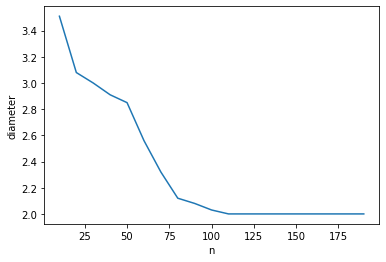

In [32]:
#18
datalist=[]
numbs=[]
for j in range(10,200,10):
    diameters=[0]*N
    for i in range(N):
        diameters[i]=gencal(j,p)
    sums=0
    for i in diameters:
        sums+=i
    datalist.append(sums/N)
    numbs.append(j)
fig, ax = plt.subplots()
ax.plot(numbs,datalist)
ax.set_xlabel("n")
ax.set_ylabel("diameter")
#As n grows, the mean diameter falls